In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pypher import pypher

# Functions

In [2]:
def psnr(img1, img2):
    mse = np.mean((img1-img2)**2)
    pix_max = 255
    return 100 if mse==0 else 20*np.log10(pix_max/np.sqrt(mse))

In [3]:
def deblur_tls(img, single_kernel):
    H=pypher.psf2otf(single_kernel,shape=(img.shape[0], img.shape[1]))
    y = np.fft.fftshift(np.fft.fft2(img))
    A = np.eye(H.shape[0])
    A = cv2.resize(A, (img.shape[1], img.shape[0]))
    A = np.fft.fftshift(np.fft.fft2(A))
    a = H.conj()*H+0.0002*A.conj()*A
    x_ls_img = H.conj()*y/a
    x_ls_img = np.abs(np.fft.ifft2(np.fft.ifftshift(x_ls_img)))
    return x_ls_img

In [4]:
# for Donald Grayscale
def deblur2d_tls_plot(img, kernel, original_img):
    plt.figure(figsize=(20,12))
    for i in range(4):
        filtered_img = deblur_tls(img[i], kernel[i])
        print(f'PSNR donald_1_deblur_tls_kernel{i+1}', psnr(filtered_img, original_img))
        plt.subplot(2,2,i+1)
        plt.title(f'kernel {i+1}')
        plt.xticks([])
        plt.yticks([])
        plt.imshow(filtered_img, cmap='gray')
        plt.imsave(path+f'outputs/P5/part_c/donald_1_deblur_tls_kernel{i+1}.png', filtered_img, cmap='gray')
    plt.savefig(path+f'outputs/P5/part_c/donald_1_deblur_tls.png')
    plt.show()

In [5]:
# for Donald RGB
def deblur3d_tls_plot(img, kernel, original_img):
    plt.figure(figsize=(20,12))
    for i in range(4):
        filtered_img = []
        for j in range(3):
            fil = deblur_tls(img[i][:,:,j],kernel[i])
            fil = fil/np.max(fil)*255
            print(f'PSNR donald_2_deblur_tls_kernel {i+1}_channel {j+1}', psnr(fil, original_img[:,:,j]))
            filtered_img.append(fil)
        filtered_img = np.dstack(filtered_img)
        filtered_img = cv2.cvtColor(filtered_img.astype('uint8'), cv2.COLOR_BGR2RGB)
        plt.subplot(2,2,i+1)
        plt.title(f'kernel {i+1}')
        plt.xticks([])
        plt.yticks([])
        plt.imshow(filtered_img, cmap='gray')
        plt.imsave(path+f'outputs/P5/part_c/donald_2_deblur_tls_kernel_{i+1}.png', filtered_img, cmap='gray')
    plt.savefig(path+f'outputs/P5/part_c/donald_2_deblur_tls.png')

# Importing the Data

In [6]:
path = 'F://Uni/992/Digital Image Processing/Homeworks/DIP_HW3/'

donald_in_car_1 = cv2.imread(path + 'inputs/P5/donald_in_car_1.png')
donald_in_car_1 = cv2.cvtColor(donald_in_car_1, cv2.COLOR_BGR2GRAY)
donald_in_car_2 = cv2.imread(path + 'inputs/P5/donald_in_car_2.png')

In [7]:
kernel = []
for i in range(1,5):
    img = cv2.imread(path + f'inputs/P5/kernel_{i}.png')
    kernel.append(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))

In [8]:
donald_gray = []
for i in range(1,5):
    img = cv2.imread(path + f'outputs/P5/part_a/donald_1_blur_kernel_{i}.png')
    donald_gray.append(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))

In [9]:
donald_rgb = []
for i in range(1,5):
    img = cv2.imread(path + f'outputs/P5/part_a/donald_2_blur_kernel_{i}.png')
    donald_rgb.append(img)

# Donald in the Car Grayscale

PSNR donald_1_deblur_tls_kernel1 6.79860458134789
PSNR donald_1_deblur_tls_kernel2 6.810627847908122
PSNR donald_1_deblur_tls_kernel3 6.797744479910566
PSNR donald_1_deblur_tls_kernel4 6.7950844821658265


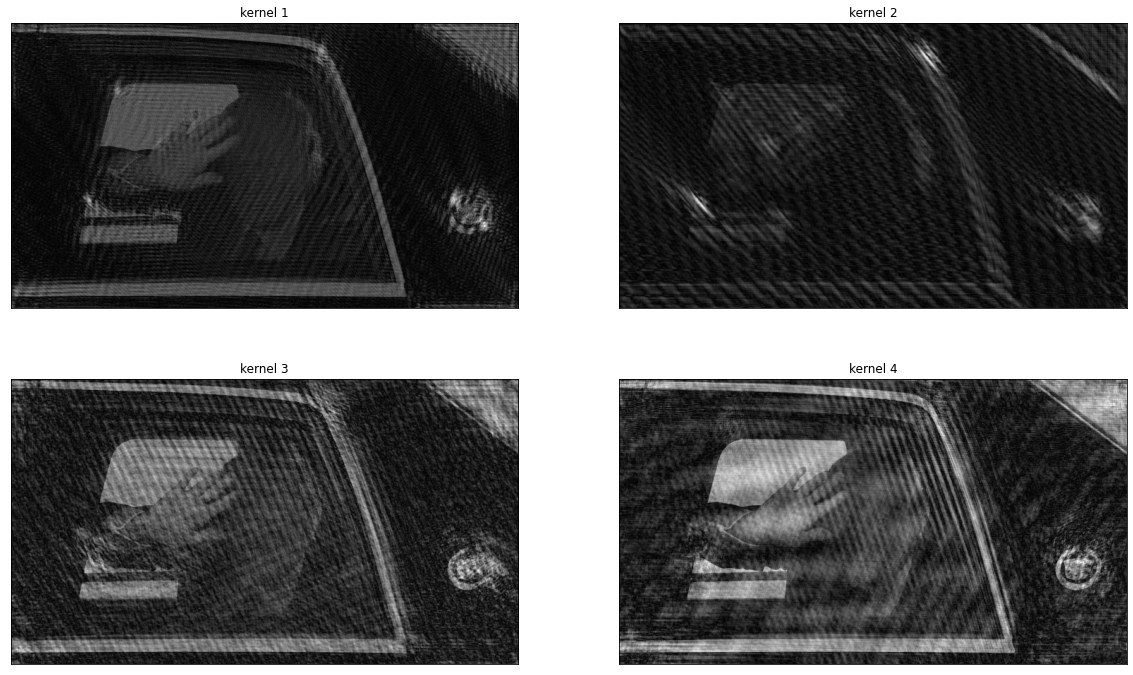

In [10]:
deblur2d_tls_plot(donald_gray,kernel,donald_in_car_1)

# Donald in the Car RGB

PSNR donald_2_deblur_tls_kernel 1_channel 1 11.790384902670986
PSNR donald_2_deblur_tls_kernel 1_channel 2 12.216228649371452
PSNR donald_2_deblur_tls_kernel 1_channel 3 12.179509212394146
PSNR donald_2_deblur_tls_kernel 2_channel 1 9.789672921477678
PSNR donald_2_deblur_tls_kernel 2_channel 2 9.890246511648051
PSNR donald_2_deblur_tls_kernel 2_channel 3 9.773857793878047
PSNR donald_2_deblur_tls_kernel 3_channel 1 13.000947188663952
PSNR donald_2_deblur_tls_kernel 3_channel 2 13.222749643763205
PSNR donald_2_deblur_tls_kernel 3_channel 3 12.86797463099967
PSNR donald_2_deblur_tls_kernel 4_channel 1 16.080360810520475
PSNR donald_2_deblur_tls_kernel 4_channel 2 16.166711158841874
PSNR donald_2_deblur_tls_kernel 4_channel 3 15.996960963145712


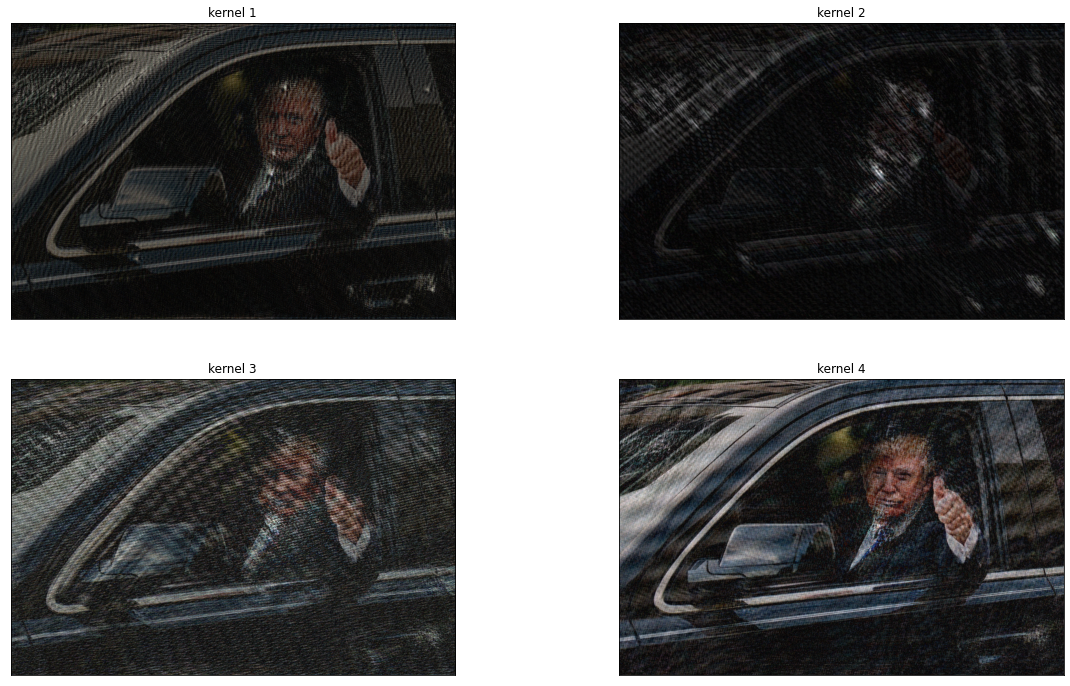

In [11]:
deblur3d_tls_plot(donald_rgb,kernel,donald_in_car_2)